**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - Systèmes de recommandation](static/03-03-banner.png)
<br/>
**Objectif: Implémenter et évaluer l'algorithme de filtrage collaboratif sur un jeu de données constitué de notations de films et effectuer des prédictions sur de nouveaux utilisateurs**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1 - Chargement et exploration sommaire des données

Nous commencons par charger le jeu de données des notations de films et essayons de comprendre la structure des données

**Exercice 1-1 - À l'aide de NumPy, chargez le jeu de données contenu dans le fichier `movies.npz`. Quels tableaux sont disponibles dans ce fichier ?**

In [2]:
import numpy as np
# Compléter cette cellule ~ 2 lignes de code
movies = np.load('../../data/movies.npz')

In [3]:
movies.files

['Y', 'R']

**Exercice 1-2 - Quelles sont les dimensions respectives des tableaux contenus dans l'objet `movies` ?**

In [4]:
# Compléter cette cellule ~ 2 lignes de code
movies['Y'].shape

(1682, 943)

In [5]:
movies['R'].shape

(1682, 943)

**Exercice 1-3 - Quel est le type de notation utilisée ?**

In [6]:
# Compléter cette cellule ~ 1 ligne de code
np.unique(movies['Y'])

array([0, 1, 2, 3, 4, 5], dtype=uint8)

**Exercice 1-4 - Calculer la moyenne des notes du premier film. Identifiez ce film à l'aide du fichier movie_ids.txt**

In [7]:
# Compléter cette cellule ~ 1-4 lignes de code

Y_ = movies['Y']
R_ = movies['R']

Y_[0,:].mean()

mask = R_[0,:] == 1
#mask
Y_[0,mask].mean()

3.8783185840707963

In [8]:
#Y0 = Y_[0,:]
#Y0
#R0 = R_[0,:]
#R0

Y_[0,:].sum() / R_[0,:].sum()


3.8783185840707963

In [9]:
!cat ../../data/movie_ids.txt | head

1 Toy Story (1995)
2 GoldenEye (1995)
3 Four Rooms (1995)
4 Get Shorty (1995)
5 Copycat (1995)
6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
7 Twelve Monkeys (1995)
8 Babe (1995)
9 Dead Man Walking (1995)
10 Richard III (1995)


**Exercice 1-5 - À l'aide d'une méthode de votre choix, afficher la matrice d'utilité. Que constatez-vous ?**

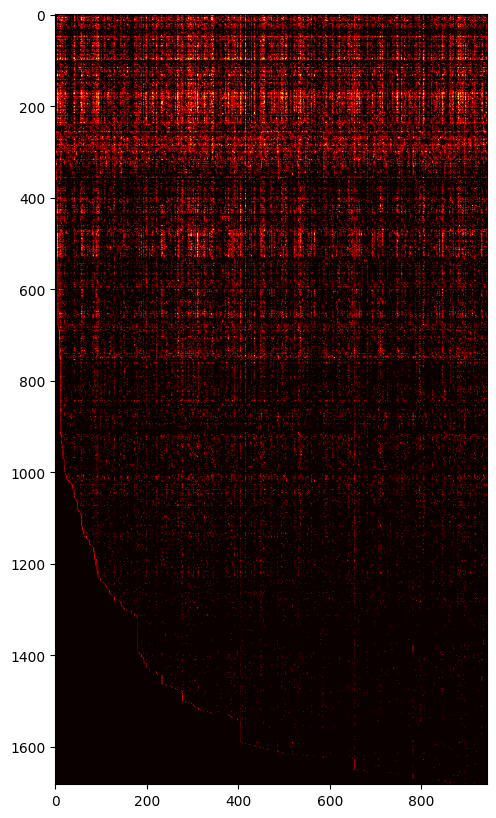

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
# Compléter cette cellule ~ 1-2 lignes de code
plt.imshow(Y_, cmap="hot")

## 2 - Filtrage collaboratif

Nous allons maintenant implémenter l'algorithme de filtrage collaboratif. Afin de faciliter la tâche, nous allons y aller en plusieurs étapes ;-)

**Exercice 2-1 - "Retirer" des données du jeu d'entraînement pour constituer un jeu de test. Prenez 10% des notes pour le test**

In [11]:
np.random.seed(2023)

# Compléter cette cellule ~ 5-6 lignes de code

# 1. Trouver les coordonnées des notes
# 2. Choisir 10% de ces notes au hasard
# 3. Enlever les notes choisies au 2. du jeu de données

indexes = np.where(R_ == 1)
len(indexes[0])

test_indices = np.random.choice(len(indexes[0]), int(0.1*len(indexes[0])), replace=False)

test0 = indexes[0][test_indices]
test1 = indexes[1][test_indices]

R = R_.copy()

R[test0,test1] = 0 # On retire les notes de test
R.sum()

Y = Y_.copy()

# R et Y => données d'entrainement

**Exercice 2-2 - Initialiser les variables `n_movies`, `n_users`. Initialiez aussi n (nombre de features du vecteur profile) à 10**

In [12]:
# Compléter cette cellule ~ 3 lignes de code
n_movies = Y.shape[0]
n_users = Y.shape[1]
n = 10

**Exercice 2-3 - Initialiser aléatoirement les matrices $\theta$ et $X$**

In [13]:
np.random.seed(2023)

# Compléter cette cellule ~ 2-3 lignes de code
theta = np.random.rand(n_users, n)
X = np.random.rand(n_movies, n)

In [14]:
print(f'theta: {theta.shape}')
print(f'X: {X.shape}')

theta: (943, 10)
X: (1682, 10)


**Exercice 2-4 - Calculer la fonction de coût non régularisée telle que vue en cours**

In [15]:
# Compléter cette cellule ~ 3 lignes de code
J = np.dot(X, theta.T) - Y
J = J**2
J = R * J
J = J.sum()
J = J/2
J

127686.15648734823

**Exercice 2-5 - Ajouter les termes de régularisation au coût calculé précédemment. Prenez $\lambda=10$**

In [16]:
# Compléter cette cellule ~ 1-2 lignes de code

L = 10

J_reg = J + (L/2)*(X**2).sum() + (L/2)*(theta**2).sum()
J_reg

171100.4767436747

**Exercice 2-6 - À l'aide des question précédentes, complétez la fonction `cost_reg_func()` permettant de calculer le coût régularisé. Notez que pour faciliter l'étape d'apprentissage plus bas dans le notebook, cette fonction n'accepte les paramètres que sous la forme d'un seul vecteur.**

In [17]:
def cost_reg_func(parameters, *args):
    # Obtient les arguments de la fonction
    Y, R, L, n_movies, n_users, n = args
    
    # "Déroule" le vecteur de paramètres
    parameters = parameters.reshape(n_movies + n_users, n)
    
    # "Sépare" X et theta
    X = parameters[:n_movies,:]
    theta = parameters[n_movies:,]
    
    # Compléter le code ci-dessous ~ 1-4 lignes de code
    J = np.dot(X, theta.T) - Y
    J = J**2
    J = R * J
    J = J.sum()
    J = J/2
    J_reg = J + (L/2)*(X**2).sum() + (L/2)*(theta**2).sum()
    
    return J_reg

La cellule ci-dessous permet de tester la fonction `cost_reg_func`. Vous devriez obtenir une valuer identique à celle de la **question 2-5**

In [18]:
parameters = np.vstack([X, theta]).flatten()
cost_reg_func(parameters, *(Y, R, 10, n_movies, n_users, n))

171100.4767436747

**Exercice 2-7 - Calculez les gradient non régularisés de $X$ et $\theta$**

In [19]:
# Compléter cette cellule ~ 2-4 lignes de code
X_grad = R*(np.dot(X, theta.T) - Y)
X_grad = np.dot(X_grad, theta)

theta_grad = R*(np.dot(X, theta.T) - Y)
theta_grad = np.dot(theta_grad.T, X)
theta_grad.shape

(943, 10)

**Exercice 2-8 - Ajoutez la régularisation aux gradients calculés précédemment**

In [20]:
# Compléter cette cellule ~ 2-3 lignes de code

X_grad = X_grad + L*X
theta_grad = theta_grad + L*theta

**Exercice 2-9 - À l'aide des question précédentes, complétez la fonction `grad_reg_func()` permettant de calculer les gradients régularisés. Comme pour l'exercice 2-4, notez que pour faciliter l'étape d'apprentissage plus bas dans le notebook, cette fonction n'accepte les paramètres que sous la forme d'un seul vecteur.**

In [21]:
def grad_reg_func(parameters, *args):
    # Obtient les arguments de la fonction
    Y, R, L, n_movies, n_users, n = args
    
    # "Déroule" le vecteur de paramètres
    parameters = parameters.reshape(n_movies + n_users, n)
    
    # "Sépare" X et theta
    X = parameters[:n_movies,:]
    theta = parameters[n_movies:,]
    
    # Compléter le code ci-dessous ~ 6 lignes de code
    X_grad = R*(np.dot(X, theta.T) - Y)
    X_grad = np.dot(X_grad, theta)

    theta_grad = R*(np.dot(X, theta.T) - Y)
    theta_grad = np.dot(theta_grad.T, X)
    
    X_grad = X_grad + L*X
    theta_grad = theta_grad + L*theta
    
    return np.vstack([X_grad, theta_grad]).flatten()

La cellule ci-dessous permet de tester la fonction `grad_reg_func`. 

In [22]:
parameters = np.vstack([X, theta]).flatten()
grad_reg_func(parameters, *(Y, R, 10, n_movies, n_users, n))

array([-264.56180364, -255.86531053, -251.38509448, ..., -103.64163811,
       -104.93826166, -103.93656197])

## 3 - Entraînement du filtrage collaboratif

Maintenant que nous avons les fonctions `cost_reg_func` et `grad_reg_func`, nous pouvons procéder à la phase d'entraînement de note système de recommandation basé sur le filtrage collaboratif. Pour rappel, nous devons trouver la valeur des paramètres qui minimisent la fonction de coût.

**Exercice 3-1: Avant d'entraîner votre modèle, normalisez par la moyenne les notes du jeu de données. N'oubliez pas que certaines données ont été réservées au test**

In [36]:
# Compléter cette cellule ~ 4-5 lignes de code

#Y -> Y_norm

#(lignes: movies, colonnes: users)

Y_sum = (R*Y).sum(axis=1)

R_sum = R.sum(axis=1)
R_sum[R_sum == 0] = 1

Y_mean = Y_sum/R_sum
Y_mean.shape

Y_norm = Y - Y_mean.reshape(-1,1)
Y_norm

array([[ 1.10843373,  0.10843373, -3.89156627, ...,  1.10843373,
        -3.89156627, -3.89156627],
       [-0.2       , -3.2       , -3.2       , ..., -3.2       ,
        -3.2       ,  1.8       ],
       [ 0.93023256, -3.06976744, -3.06976744, ..., -3.06976744,
        -3.06976744, -3.06976744],
       ...,
       [-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]])

**Exercice 3-2: Entraînez votre modèle à l'aide de la fonction `fmin_cg` de la librairie SciPy. Référez-vous à la documentation ci-dessous pour les détails de mise en oeuvre. Prenez $\lambda=10$**<br/>
[scipy.optimize.fmin_cg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)<br/>
**Remarque: selon votre machine, l'optimisation peut durer plusieurs minutes**

In [37]:
# Compléter la cellule ci-dessous

from scipy import optimize

initial_parameters = np.vstack([X, theta]).flatten()

model = optimize.fmin_cg(cost_reg_func, initial_parameters, grad_reg_func, args = (Y_norm, R, 10, n_movies, n_users, n) )

Optimization terminated successfully.
         Current function value: 35297.807228
         Iterations: 309
         Function evaluations: 461
         Gradient evaluations: 461


## 4 - Effectuer les prédiction

**Exercice 4-1 - À l'aide des éléments vus en cours, effectuez les prédictions (vous devrez d'abord "extraire" les vecteur $X$ et $\theta$ du modèle. Calculez la moyenne des prédictions pour le premier film de la liste. Comparez avec la valeur obtenue à l'exercice 1-4**

In [42]:
# Compléter cette cellule ~ 1-2 lignes de code
#model_ = model.reshape(...)
model_ = model.reshape(n_movies+n_users, n)
 
X_trained = model_[:n_movies,:]
theta_trained = model_[n_movies:,:]

In [50]:
predictions = np.dot(X_trained,theta_trained.T)
predictions + Y_mean.reshape(-1,1)

array([[4.16314964, 3.69053476, 3.71258726, ..., 4.28647096, 4.61075904,
        3.4862024 ],
       [3.15677547, 3.11070701, 2.83013029, ..., 3.40211108, 3.59019997,
        3.32158392],
       [3.42855433, 3.13849325, 2.53227734, ..., 3.22368272, 3.18999716,
        3.12768568],
       ...,
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ]])

In [51]:
predictions[0,:].mean() + Y_mean[0]

3.8685533741199203

**Exercice 4-2 - Calculez l'erreur de prédiction sur le jeu de test.Choisissez une métrique appropriée**

In [61]:
# Compléter cette cellule ~ 2-4 lignes de code

res = predictions[test0,test1] - Y_norm[test0, test1]

rss = (res**2).sum()
mse = rss / 10000 
rmse = np.sqrt(mse)
rmse

0.9484395818128839

## 5 - Recommandation basée sur le contenu (optionnel)

Nous allons maintenant ajouter un nouvel utilisateur (vous-même !) au jeu de données et apprendre le vecteurs de paramètres correspondant. Puisque nous n'ajoutons pas de nouveaux films, nous pouvons garder les vecteurs $X$ et appliquer une recommandation basée sur le contenu

**Exercice 5-1 - En vous réferant à la liste des films, choisissez environ 10 films que vous connaissez et notez les**

In [ ]:
# Compléter cette cellule ~ 2-4 lignes de code

**Exercice 5-2 - Adaptez les fonctions `cost_reg_func` et `grad_reg_func` pour correspondre à la recommandation basée sur le contenu**

In [ ]:
# Compléter cette cellule

**Exercice 5-3 - Entraînez le modèle pour apprendre les paramètres $\theta$ et réalisez les prédictions pour le nouvel utilisateur**

In [ ]:
# Compléter cette cellule ~ 6-8 lignes de code

## 6 - Films similaires

**Exercice 6-1 - Trouvez le film le plus similaire à Star Wars (celui de 1977)**

In [ ]:
# Compléter cette cellule ~ 10-15 lignes de code

## Fin du TP